In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## CONVERT TO PARQUET FOR PERFORMANCE PURPOSES

In [83]:
import pandas as pd
appear_df = pd.read_csv('appearances.csv')
appear_df.to_parquet('appearances.parquet')

In [90]:
appear_df = pd.read_parquet('appearances.parquet')
appear_df

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583202,4129792_703720,4129792,703720,126,126,2024-05-26,Mithat Pala,TR1,0,0,0,0,90
1583203,4129792_71292,4129792,71292,126,126,2024-05-26,Jonjo Shelvey,TR1,0,0,0,0,56
1583204,4129792_752455,4129792,752455,7775,7775,2024-05-26,Massanga Matondo,TR1,0,0,0,0,90
1583205,4129792_873440,4129792,873440,126,126,2024-05-26,Eray Korkmaz,TR1,0,0,0,0,9


In [85]:
# clumn names
column_names = appear_df.columns.tolist()
print("Column Names:", column_names)

Column Names: ['appearance_id', 'game_id', 'player_id', 'player_club_id', 'player_current_club_id', 'date', 'player_name', 'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played']


In [86]:
import seaborn as sns
appear_df.isna().sum()

appearance_id             0
game_id                   0
player_id                 0
player_club_id            0
player_current_club_id    0
date                      0
player_name               6
competition_id            0
yellow_cards              0
red_cards                 0
goals                     0
assists                   0
minutes_played            0
dtype: int64

In [87]:
# drop columns 0,4
d_col=['appearance_id','player_current_club_id']
appearance = appear_df.drop(columns=d_col)
appearance



,game_id,player_id,player_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978,38004,853,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748,79232,8841,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413,42792,6251,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418,73333,1274,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421,122011,195,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90
...,...,...,...,...,...,...,...,...,...,...,...
1583202,4129792,703720,126,2024-05-26,Mithat Pala,TR1,0,0,0,0,90
1583203,4129792,71292,126,2024-05-26,Jonjo Shelvey,TR1,0,0,0,0,56
1583204,4129792,752455,7775,2024-05-26,Massanga Matondo,TR1,0,0,0,0,90
1583205,4129792,873440,126,2024-05-26,Eray Korkmaz,TR1,0,0,0,0,9


In [89]:
player_df = pd.read_csv('players.csv')
player_df.to_parquet('players.parquet')

## CONVERT TO PARQUET 

In [91]:
player_df = pd.read_parquet('players.parquet')
player_df

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,None,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,None,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,None,NaN,None,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,None,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,None,NaN,None,None,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,None,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30522,1214946,Sid Ahmed,Aissaoui,Sid Ahmed Aissaoui,2023,2410,sid-ahmed-aissaoui,Algeria,Blida,Algeria,...,right,183.0,2026-06-30 00:00:00,Aniss Benchabane,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/sid-ahmed-aiss...,RU1,PFK CSKA Moskva,150000.0,150000.0
30523,1225269,Erdem,Çalık,Erdem Çalık,2023,3209,erdem-calik,Türkiye,Istanbul,Türkiye,...,right,NaN,2026-06-30 00:00:00,None,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/erdem-calik/pr...,TR1,Pendikspor,50000.0,50000.0
30524,1229924,Adama,Sidibeh,Adama Sidibeh,2023,2578,adama-sidibeh,None,None,The Gambia,...,None,NaN,2026-05-31 00:00:00,Willie McKay,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/adama-sidibeh/...,SC1,Saint Johnstone Football Club,250000.0,250000.0
30525,1240467,Artem,Prysyazhnyuk,Artem Prysyazhnyuk,2023,6992,artem-prysyazhnyuk,Ukraine,Odesa,Ukraine,...,left,180.0,2025-05-31 00:00:00,None,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/artem-prysyazh...,UKR1,ZAO FK Chornomorets Odessa,NaN,NaN


In [7]:
## Active Players ##


# Credit Kaggle User: https://www.kaggle.com/code/greysitorus/transfermarkt-players-data

# For giving me a guide on how to clean the dataset

In [8]:
player_df.head()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0


In [9]:
player_df.columns

Index(['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'contract_expiration_date', 'agent_name',
       'image_url', 'url', 'current_club_domestic_competition_id',
       'current_club_name', 'market_value_in_eur',
       'highest_market_value_in_eur'],
      dtype='object')

In [10]:
#columns i will drop

to_drop = ['first_name', 'last_name','image_url', 'url', 'player_code']


active_player = player_df.drop(columns=to_drop)

In [11]:
active_player = active_player[active_player["last_season"] == 2023]

In [12]:
## Let's check to see how many nulls there are

In [13]:


active_player.isna().sum()

player_id                                  0
name                                       0
last_season                                0
current_club_id                            0
country_of_birth                         344
city_of_birth                            342
country_of_citizenship                     0
date_of_birth                              0
sub_position                               3
position                                   0
foot                                     198
height_in_cm                             181
contract_expiration_date                 214
agent_name                              1939
current_club_domestic_competition_id       0
current_club_name                          0
market_value_in_eur                       38
highest_market_value_in_eur               38
dtype: int64

In [14]:
# Let's drop all the nulls

In [15]:
clean_active = active_player.dropna()

In [16]:
clean_active.isna().sum()

player_id                               0
name                                    0
last_season                             0
current_club_id                         0
country_of_birth                        0
city_of_birth                           0
country_of_citizenship                  0
date_of_birth                           0
sub_position                            0
position                                0
foot                                    0
height_in_cm                            0
contract_expiration_date                0
agent_name                              0
current_club_domestic_competition_id    0
current_club_name                       0
market_value_in_eur                     0
highest_market_value_in_eur             0
dtype: int64

In [17]:
# Source: >>> from datetime import datetime
# https://stackoverflow.com/questions/12430287/how-can-i-convert-a-string-into-a-date-object-and-get-year-month-and-day-separa
# https://github.com/softhints/Pandas-Tutorials/blob/master/datetime/1.extract-month-and-year-datetime-column-in-pandas.ipynb

In [18]:
from datetime import datetime

In [19]:
clean_active['Contract Year'] = pd.to_datetime(clean_active['contract_expiration_date']).dt.year

/var/folders/j9/z_s02ktd6vb0_xqswtbtq4jc0000gn/T/ipykernel_42101/1781234186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_active['Contract Year'] = pd.to_datetime(clean_active['contract_expiration_date']).dt.year


In [20]:
clean_active['Number_Years_Left_On_Contract'] =  clean_active['Contract Year'] -2024

/var/folders/j9/z_s02ktd6vb0_xqswtbtq4jc0000gn/T/ipykernel_42101/2332748063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_active['Number_Years_Left_On_Contract'] =  clean_active['Contract Year'] -2024


In [21]:
clean_active

,player_id,name,last_season,current_club_id,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,contract_expiration_date,agent_name,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,Contract Year,Number_Years_Left_On_Contract
348,4391,Boy Waterman,2023,383,Netherlands,Lelystad,Netherlands,1984-01-24,Goalkeeper,Goalkeeper,right,188.0,2024-06-30 00:00:00,Sp international,NL1,Eindhovense Voetbalvereniging Philips Sport Ve...,75000.0,3000000.0,2024,0
644,7161,Jonas Hofmann,2023,15,Germany,Heidelberg,Germany,1992-07-14,Attacking Midfield,Midfield,right,176.0,2027-06-30 00:00:00,Dr. Marco Gutfleisch,L1,Bayer 04 Leverkusen Fußball,10000000.0,16000000.0,2027,3
762,8246,Philipp Pentke,2023,3,East Germany (GDR),Freiberg,Germany,1985-05-01,Goalkeeper,Goalkeeper,right,191.0,2025-06-30 00:00:00,Bigpoint,L1,1. Fußball-Club Köln,300000.0,400000.0,2025,1
808,9500,David Marshall,2023,903,Scotland,Glasgow,Scotland,1985-03-05,Goalkeeper,Goalkeeper,right,187.0,2024-05-31 00:00:00,CAA Stellar,SC1,Hibernian Football Club,50000.0,3000000.0,2024,0
913,11530,Lionel Carole,2023,3205,France,Montreuil,France,1991-04-12,Left-Back,Defender,left,182.0,2024-06-30 00:00:00,PREMIER'ART,TR1,Kayserispor Kulübü,650000.0,3500000.0,2024,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30503,1160405,Viktor Dolgyi,2023,18303,Ukraine,Donetsk,Ukraine,2004-01-02,Goalkeeper,Goalkeeper,left,197.0,2027-06-30 00:00:00,PFA,UKR1,FK Oleksandriya,50000.0,50000.0,2027,3
30504,1161013,Mustafa Tan,2023,152,Türkiye,Samsun,Türkiye,2005-04-27,Right-Back,Defender,right,181.0,2028-06-30 00:00:00,SEG,TR1,Samsunspor,300000.0,300000.0,2028,4
30513,1176345,Mahamadou Nagida,2023,273,Cameroon,Douala,Cameroon,2005-06-28,Left-Back,Defender,left,176.0,2028-06-30 00:00:00,Soccermax,FR1,Stade Rennais Football Club,500000.0,500000.0,2028,4
30515,1176866,Motez Nourani,2023,3840,Tunisia,Sousse,Tunisia,2002-01-11,Left Winger,Attack,right,177.0,2026-06-30 00:00:00,PROhorizons Group,TR1,Adana Demirspor Kulübü,175000.0,250000.0,2026,2


In [22]:
## Get Age AS OF YEAR 

In [23]:
clean_active['Age'] = 2024- (pd.to_datetime(clean_active['date_of_birth']).dt.year)
clean_active.head()

/var/folders/j9/z_s02ktd6vb0_xqswtbtq4jc0000gn/T/ipykernel_42101/84209086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_active['Age'] = 2024- (pd.to_datetime(clean_active['date_of_birth']).dt.year)


,player_id,name,last_season,current_club_id,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,...,height_in_cm,contract_expiration_date,agent_name,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,Contract Year,Number_Years_Left_On_Contract,Age
348,4391,Boy Waterman,2023,383,Netherlands,Lelystad,Netherlands,1984-01-24,Goalkeeper,Goalkeeper,...,188.0,2024-06-30 00:00:00,Sp international,NL1,Eindhovense Voetbalvereniging Philips Sport Ve...,75000.0,3000000.0,2024,0,40
644,7161,Jonas Hofmann,2023,15,Germany,Heidelberg,Germany,1992-07-14,Attacking Midfield,Midfield,...,176.0,2027-06-30 00:00:00,Dr. Marco Gutfleisch,L1,Bayer 04 Leverkusen Fußball,10000000.0,16000000.0,2027,3,32
762,8246,Philipp Pentke,2023,3,East Germany (GDR),Freiberg,Germany,1985-05-01,Goalkeeper,Goalkeeper,...,191.0,2025-06-30 00:00:00,Bigpoint,L1,1. Fußball-Club Köln,300000.0,400000.0,2025,1,39
808,9500,David Marshall,2023,903,Scotland,Glasgow,Scotland,1985-03-05,Goalkeeper,Goalkeeper,...,187.0,2024-05-31 00:00:00,CAA Stellar,SC1,Hibernian Football Club,50000.0,3000000.0,2024,0,39
913,11530,Lionel Carole,2023,3205,France,Montreuil,France,1991-04-12,Left-Back,Defender,...,182.0,2024-06-30 00:00:00,PREMIER'ART,TR1,Kayserispor Kulübü,650000.0,3500000.0,2024,0,33


In [24]:
## Let's check if there are any discrepancy with the position and sub-position

In [25]:
clean_active.position.unique()
clean_active.sub_position.unique()

array(['Goalkeeper', 'Midfield', 'Defender', 'Attack'], dtype=object)

array(['Goalkeeper', 'Attacking Midfield', 'Left-Back', 'Centre-Back',
       'Right-Back', 'Defensive Midfield', 'Left Winger',
       'Centre-Forward', 'Central Midfield', 'Right Winger',
       'Right Midfield', 'Second Striker', 'Left Midfield'], dtype=object)

In [26]:
#### I've worked so hard on this dataset, let's make a copy just in case #####

In [27]:
clean_active_copy = clean_active

In [28]:
clean_active_copy

,player_id,name,last_season,current_club_id,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,...,height_in_cm,contract_expiration_date,agent_name,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,Contract Year,Number_Years_Left_On_Contract,Age
348,4391,Boy Waterman,2023,383,Netherlands,Lelystad,Netherlands,1984-01-24,Goalkeeper,Goalkeeper,...,188.0,2024-06-30 00:00:00,Sp international,NL1,Eindhovense Voetbalvereniging Philips Sport Ve...,75000.0,3000000.0,2024,0,40
644,7161,Jonas Hofmann,2023,15,Germany,Heidelberg,Germany,1992-07-14,Attacking Midfield,Midfield,...,176.0,2027-06-30 00:00:00,Dr. Marco Gutfleisch,L1,Bayer 04 Leverkusen Fußball,10000000.0,16000000.0,2027,3,32
762,8246,Philipp Pentke,2023,3,East Germany (GDR),Freiberg,Germany,1985-05-01,Goalkeeper,Goalkeeper,...,191.0,2025-06-30 00:00:00,Bigpoint,L1,1. Fußball-Club Köln,300000.0,400000.0,2025,1,39
808,9500,David Marshall,2023,903,Scotland,Glasgow,Scotland,1985-03-05,Goalkeeper,Goalkeeper,...,187.0,2024-05-31 00:00:00,CAA Stellar,SC1,Hibernian Football Club,50000.0,3000000.0,2024,0,39
913,11530,Lionel Carole,2023,3205,France,Montreuil,France,1991-04-12,Left-Back,Defender,...,182.0,2024-06-30 00:00:00,PREMIER'ART,TR1,Kayserispor Kulübü,650000.0,3500000.0,2024,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30503,1160405,Viktor Dolgyi,2023,18303,Ukraine,Donetsk,Ukraine,2004-01-02,Goalkeeper,Goalkeeper,...,197.0,2027-06-30 00:00:00,PFA,UKR1,FK Oleksandriya,50000.0,50000.0,2027,3,20
30504,1161013,Mustafa Tan,2023,152,Türkiye,Samsun,Türkiye,2005-04-27,Right-Back,Defender,...,181.0,2028-06-30 00:00:00,SEG,TR1,Samsunspor,300000.0,300000.0,2028,4,19
30513,1176345,Mahamadou Nagida,2023,273,Cameroon,Douala,Cameroon,2005-06-28,Left-Back,Defender,...,176.0,2028-06-30 00:00:00,Soccermax,FR1,Stade Rennais Football Club,500000.0,500000.0,2028,4,19
30515,1176866,Motez Nourani,2023,3840,Tunisia,Sousse,Tunisia,2002-01-11,Left Winger,Attack,...,177.0,2026-06-30 00:00:00,PROhorizons Group,TR1,Adana Demirspor Kulübü,175000.0,250000.0,2026,2,22


### Let's do some visualizations ###

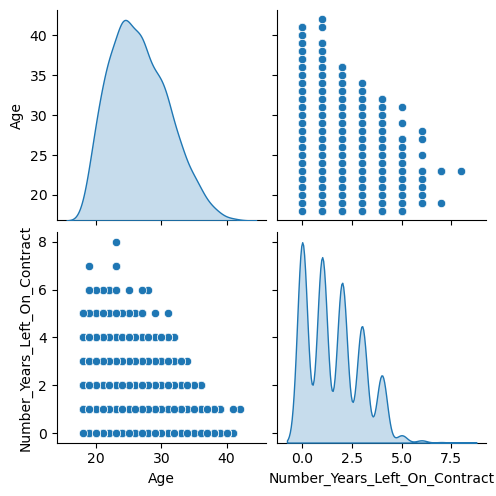

In [29]:
sns.pairplot(clean_active[["Age", "position", "Number_Years_Left_On_Contract"]], diag_kind="kde")

## Plot histogram of Player and Age

(array([ 300.,  542., 1050.,  678.,  554.,  652.,  240.,  176.,   37.,
          10.]),
 array([18. , 20.4, 22.8, 25.2, 27.6, 30. , 32.4, 34.8, 37.2, 39.6, 42. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Age of Players')

Text(0.5, 0, 'Age')

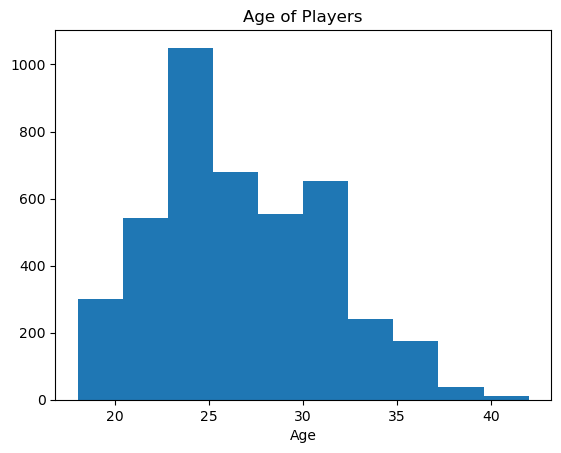

In [30]:
plt.hist(clean_active['Age'])
plt.title("Age of Players")
plt.xlabel("Age")

(array([1.148e+03, 1.062e+03, 9.160e+02, 6.680e+02, 0.000e+00, 3.860e+02,
        4.200e+01, 1.300e+01, 3.000e+00, 1.000e+00]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, '# of Years on Contract')

Text(0.5, 0, 'Remaining years')

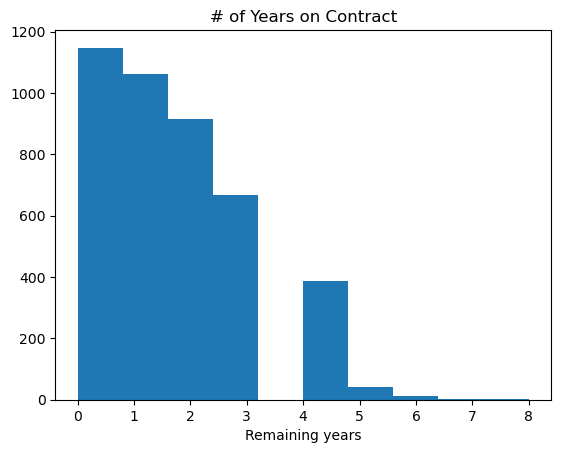

In [31]:
plt.hist(clean_active["Number_Years_Left_On_Contract"])
plt.title("# of Years on Contract")
plt.xlabel("Remaining years")

In [40]:
active_appear = pd.merge(clean_active, appear_df, on = "player_id", how = "left") 


In [41]:
active_appear

,player_id,name,last_season,current_club_id,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,...,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,4391,Boy Waterman,2023,383,Netherlands,Lelystad,Netherlands,1984-01-24,Goalkeeper,Goalkeeper,...,383.0,383.0,2012-08-30,Boy Waterman,ELQ,0.0,0.0,0.0,0.0,90.0
1,4391,Boy Waterman,2023,383,Netherlands,Lelystad,Netherlands,1984-01-24,Goalkeeper,Goalkeeper,...,383.0,383.0,2012-09-20,Boy Waterman,EL,0.0,0.0,0.0,0.0,90.0
2,4391,Boy Waterman,2023,383,Netherlands,Lelystad,Netherlands,1984-01-24,Goalkeeper,Goalkeeper,...,383.0,383.0,2012-09-23,Boy Waterman,NL1,0.0,0.0,0.0,0.0,90.0
3,4391,Boy Waterman,2023,383,Netherlands,Lelystad,Netherlands,1984-01-24,Goalkeeper,Goalkeeper,...,383.0,383.0,2012-09-27,Boy Waterman,NLP,0.0,0.0,0.0,0.0,90.0
4,4391,Boy Waterman,2023,383,Netherlands,Lelystad,Netherlands,1984-01-24,Goalkeeper,Goalkeeper,...,383.0,383.0,2012-09-30,Boy Waterman,NL1,0.0,0.0,0.0,0.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486061,1176866,Motez Nourani,2023,3840,Tunisia,Sousse,Tunisia,2002-01-11,Left Winger,Attack,...,3840.0,3840.0,2024-01-20,Motez Nourani,TR1,0.0,0.0,0.0,0.0,16.0
486062,1176866,Motez Nourani,2023,3840,Tunisia,Sousse,Tunisia,2002-01-11,Left Winger,Attack,...,3840.0,3840.0,2024-01-23,Motez Nourani,TR1,0.0,0.0,0.0,0.0,60.0
486063,1176866,Motez Nourani,2023,3840,Tunisia,Sousse,Tunisia,2002-01-11,Left Winger,Attack,...,3840.0,3840.0,2024-01-27,Motez Nourani,TR1,0.0,0.0,0.0,0.0,45.0
486064,1176866,Motez Nourani,2023,3840,Tunisia,Sousse,Tunisia,2002-01-11,Left Winger,Attack,...,3840.0,3840.0,2024-02-04,Motez Nourani,TR1,0.0,0.0,0.0,0.0,45.0


In [ ]:
##active_appear = pd.merge(clean_active, player_value on = "player_id", how = "inner") 


In [35]:
active_appear.isna().sum()

player_id                                 0
name                                      0
last_season                               0
current_club_id                           0
country_of_birth                          0
city_of_birth                             0
country_of_citizenship                    0
date_of_birth                             0
sub_position                              0
position                                  0
foot                                      0
height_in_cm                              0
contract_expiration_date                  0
agent_name                                0
current_club_domestic_competition_id      0
current_club_name                         0
market_value_in_eur                       0
highest_market_value_in_eur               0
Contract Year                             0
Number_Years_Left_On_Contract             0
Age                                       0
appearance_id                           112
game_id                         

In [42]:
active_appear = active_appear.dropna()

In [43]:
active_appear.isna().sum()

player_id                               0
name                                    0
last_season                             0
current_club_id                         0
country_of_birth                        0
city_of_birth                           0
country_of_citizenship                  0
date_of_birth                           0
sub_position                            0
position                                0
foot                                    0
height_in_cm                            0
contract_expiration_date                0
agent_name                              0
current_club_domestic_competition_id    0
current_club_name                       0
market_value_in_eur                     0
highest_market_value_in_eur             0
Contract Year                           0
Number_Years_Left_On_Contract           0
Age                                     0
appearance_id                           0
game_id                                 0
player_club_id                    

In [44]:
active_player_performance_stats_agg= active_appear.groupby(['player_id']).agg({ 
'player_name': 'first',
'position': 'first',
'sub_position' : 'first',
'Age' : 'last',
'foot': 'first', 
'country_of_birth' : 'first',
'height_in_cm': 'first',
'red_cards': 'sum',
'yellow_cards': 'sum',
'goals': 'sum',
'assists': 'sum',
'minutes_played': 'sum',
'current_club_name' : 'last',
'current_club_domestic_competition_id': 'last',
'agent_name' : 'last',
'Contract Year': 'last',
'Number_Years_Left_On_Contract' : 'last',
'market_value_in_eur' : 'mean',
'highest_market_value_in_eur' : 'mean'}).reset_index()
active_player_performance_stats_agg

,player_id,player_name,position,sub_position,Age,foot,country_of_birth,height_in_cm,red_cards,yellow_cards,goals,assists,minutes_played,current_club_name,current_club_domestic_competition_id,agent_name,Contract Year,Number_Years_Left_On_Contract,market_value_in_eur,highest_market_value_in_eur
0,4391,Boy Waterman,Goalkeeper,Goalkeeper,40,right,Netherlands,188.0,2.0,4.0,0.0,2.0,11255.0,Eindhovense Voetbalvereniging Philips Sport Ve...,NL1,Sp international,2024,0,75000.0,3000000.0
1,7161,Jonas Hofmann,Midfield,Attacking Midfield,32,right,Germany,176.0,0.0,15.0,64.0,78.0,20209.0,Bayer 04 Leverkusen Fußball,L1,Dr. Marco Gutfleisch,2027,3,10000000.0,16000000.0
2,8246,Philipp Pentke,Goalkeeper,Goalkeeper,39,right,East Germany (GDR),191.0,0.0,1.0,0.0,0.0,1110.0,1. Fußball-Club Köln,L1,Bigpoint,2025,1,300000.0,400000.0
3,9500,David Marshall,Goalkeeper,Goalkeeper,39,right,Scotland,187.0,0.0,6.0,0.0,1.0,11500.0,Hibernian Football Club,SC1,CAA Stellar,2024,0,50000.0,3000000.0
4,11530,Lionel Carole,Defender,Left-Back,33,left,France,182.0,0.0,28.0,0.0,13.0,16652.0,Kayserispor Kulübü,TR1,PREMIER'ART,2024,0,650000.0,3500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4122,1141628,Yunus Emre Konak,Midfield,Defensive Midfield,18,right,Türkiye,181.0,0.0,2.0,0.0,1.0,1330.0,Brentford Football Club,GB1,FutureBall,2029,5,3500000.0,3500000.0
4123,1159925,Sergiy Korniychuk,Defender,Left-Back,20,left,Ukraine,180.0,0.0,4.0,1.0,0.0,666.0,FK Minaj,UKR1,MSM Group,2026,2,100000.0,100000.0
4124,1161013,Mustafa Tan,Defender,Right-Back,19,right,Türkiye,181.0,0.0,2.0,0.0,0.0,339.0,Samsunspor,TR1,SEG,2028,4,300000.0,300000.0
4125,1176345,Mahamadou Nagida,Defender,Left-Back,19,left,Cameroon,176.0,0.0,1.0,0.0,0.0,215.0,Stade Rennais Football Club,FR1,Soccermax,2028,4,500000.0,500000.0


In [45]:
active_player_performance_stats_agg.isna().sum()

player_id                               0
player_name                             0
position                                0
sub_position                            0
Age                                     0
foot                                    0
country_of_birth                        0
height_in_cm                            0
red_cards                               0
yellow_cards                            0
goals                                   0
assists                                 0
minutes_played                          0
current_club_name                       0
current_club_domestic_competition_id    0
agent_name                              0
Contract Year                           0
Number_Years_Left_On_Contract           0
market_value_in_eur                     0
highest_market_value_in_eur             0
dtype: int64

In [46]:
active_player_performance_stats_agg['Number_Years_Left_On_Contract'].value_counts()

0    1124
1    1025
2     894
3     647
4     379
5      41
6      13
7       3
8       1
Name: Number_Years_Left_On_Contract, dtype: int64

In [47]:
active_player_performance_stats_agg['Age'].value_counts().head()

24    368
25    355
27    342
26    331
23    302
Name: Age, dtype: int64

In [ ]:
#### Credit again to https://www.kaggle.com/code/greysitorus/transfermarkt-players-data ###

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


## Objective: Predict # years left on contract 

In [49]:
features_used = ['goals', 'Age','assists','minutes_played']
x = active_player_performance_stats_agg[features_used]
y = active_player_performance_stats_agg['Number_Years_Left_On_Contract']

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

## Baseline model: Linear Regression 

In [51]:
#Scale the Data 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(x_train)
x_scaled_train=scaler.transform(x_train)
x_scaled_test = scaler.transform(x_test)

In [52]:
# Train model
from sklearn.linear_model import LinearRegression
YL_LR_model = LinearRegression()
YL_LR_model.fit(x_scaled_train, y_train)

LinearRegression()

In [53]:
ylr_train_val= YL_LR_model.predict(x_scaled_train)

In [54]:
import math
from sklearn.metrics import mean_squared_error
mse_train_ylr = mean_squared_error(y_train, ylr_train_val)
RMSE_train_ylr = math.sqrt(mse_train_ylr)

In [55]:
ylr_test_val= YL_LR_model.predict(x_scaled_test)

In [56]:
ylr_test_val

array([0.64276348, 2.41256093, 2.32286468, ..., 2.20740759, 2.06007396,
       1.55629057])

In [57]:
mse_test_ylr = mean_squared_error(y_test, ylr_test_val)
RMSE_test_ylr = math.sqrt(mse_test_ylr)

In [58]:
RMSE_train_ylr
RMSE_test_ylr

1.2558502180026674

1.2368735391865282

## Take the Mean Absolute Error of Linear Regression

In [59]:
from sklearn.metrics import mean_absolute_error
mae_train_ylr_val = mean_absolute_error(y_train, ylr_train_val)
mae_train_ylr_val

1.0293856226673255

In [60]:
mae_test_ylr_val = mean_absolute_error(y_test, ylr_test_val)
mae_test_ylr_val

1.0082467810016544

## Graph Features

In [61]:
x_scaled=scaler.transform(x)

coefficient and bias are : [ 0.04503489 -0.70312288 -0.04022707  0.33503199] and 1.5998465909685589


<BarContainer object of 4 artists>

([0, 1, 2, 3],
 [Text(0, 0, 'goals'),
  Text(1, 0, 'Age'),
  Text(2, 0, 'assists'),
  Text(3, 0, 'minutes_played')])

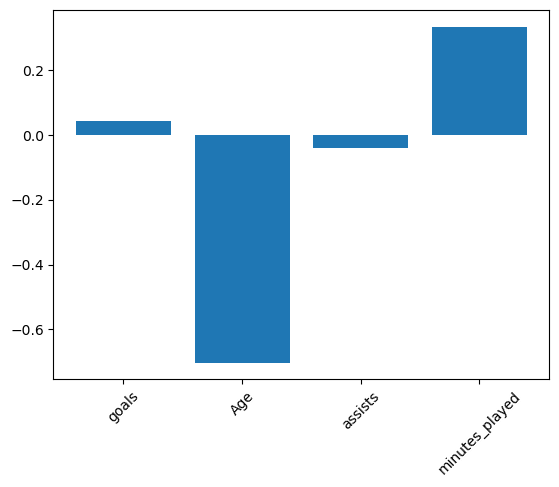

In [62]:
yl_graph = YL_LR_model.fit(x_scaled,active_player_performance_stats_agg['Number_Years_Left_On_Contract'])  # fit the scaled data with MPG
# display coefficients/weights of all features
print('coefficient and bias are :',yl_graph.coef_,'and', yl_graph.intercept_) # print w and b
# bar plot to show the importance
plt.bar(x.columns, yl_graph.coef_)
plt.xticks(rotation = 45)

In [64]:
import tensorflow as tf

In [65]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(1000, activation='relu', input_shape=(4,)))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(250, activation='relu'))
model.add(layers.Dense(250, activation='relu'))
model.add(layers.Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error' ])

/Users/chrisgallevo/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
history = model.fit(x_scaled_train, y_train, epochs = 100, batch_size = 10, validation_data= (x_scaled_test, y_test))

Epoch 1/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.0518 - mean_absolute_error: 1.1477 - mean_squared_error: 2.0518 - val_loss: 1.5268 - val_mean_absolute_error: 1.0053 - val_mean_squared_error: 1.5268
Epoch 2/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6257 - mean_absolute_error: 1.0306 - mean_squared_error: 1.6257 - val_loss: 1.5181 - val_mean_absolute_error: 1.0098 - val_mean_squared_error: 1.5181
Epoch 3/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6458 - mean_absolute_error: 1.0445 - mean_squared_error: 1.6458 - val_loss: 1.7137 - val_mean_absolute_error: 1.0638 - val_mean_squared_error: 1.7137
Epoch 4/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5646 - mean_absolute_error: 1.0260 - mean_squared_error: 1.5646 - val_loss: 1.5249 - val_mean_absolute_error: 1.0033 - val_mean_squared_error: 1.5249
Epoch 5/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5774 - mean_absolute_error: 1.0204 - mean_squared_error: 1.5774 - val_loss: 1.4857 - 

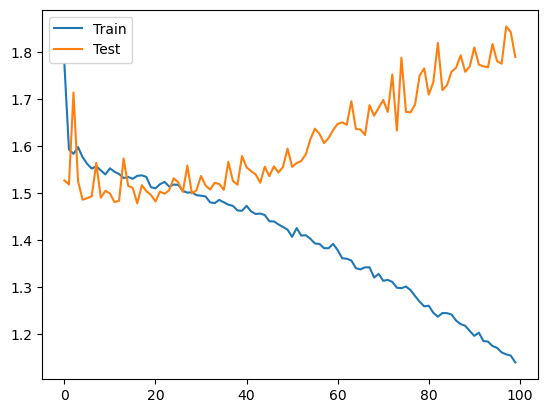

In [67]:
import matplotlib.pyplot as plt
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.legend(['Train', 'Test'])

In [68]:
YL_dnn_train = model.predict(x_scaled_train)
YL_dnn_test = model.predict(x_scaled_test)

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step


In [69]:
YL_RMSE_DNN_Train = math.sqrt(mean_squared_error(YL_dnn_train, y_train))
YL_RMSE_DNN_Test = math.sqrt(mean_squared_error(YL_dnn_test, y_test))

## RMSE OF DNN

In [70]:
YL_RMSE_DNN_Train
YL_RMSE_DNN_Test

1.046842557343709

1.337691774268857

In [71]:
YL_MAE_DNN_Train =mean_absolute_error(YL_dnn_train, y_train)
YL_MAE_DNN_Test = mean_absolute_error(YL_dnn_test, y_test)

## MAE of DNN 

In [72]:
YL_MAE_DNN_Train
YL_MAE_DNN_Test

0.8097924899949674

1.0837852460444215

## RANDOM FORREST REGRESSION

In [73]:
from sklearn.ensemble import RandomForestRegressor

rfr_yl = RandomForestRegressor(n_estimators=100, max_features=4)
rfr_yl.fit(x_scaled_train,y_train)

RandomForestRegressor(max_features=4)

In [74]:
rfr_yl_train_pred = rfr_yl.predict(x_scaled_train)

In [75]:
rfr_yl_test_pred = rfr_yl.predict(x_scaled_test)

In [76]:
rfr_yl_mse_train = mean_squared_error(rfr_yl_train_pred, y_train)
rfr_yl_mse_test = mean_squared_error(rfr_yl_test_pred, y_test)

rfr_yl_smse_train = math.sqrt(rfr_yl_mse_train)
rfr_yl_smse_test = math.sqrt(rfr_yl_mse_test)

In [77]:
rfr_yl_smse_train
rfr_yl_smse_test

0.49688941480195337

1.3026183806194185

In [78]:
rfr_yl_mae_train = mean_absolute_error(rfr_yl_train_pred, y_train)
rfr_yl_mae_test = mean_absolute_error(rfr_yl_test_pred, y_test)

In [79]:
rfr_yl_mae_train
rfr_yl_mae_test

0.39084828024007384

1.0489313066092727

## XGBOOST Regression ##

In [96]:

# Code largely takem from Geeks4Geeks' implementation 
# https://www.geeksforgeeks.org/xgboost-for-regression/#
import xgboost 
from sklearn.metrics import mean_squared_error
  
# Contrary to geeks4geeks implementation reg:linear became defunct, hence we must use squared error
# Use xgb regressor
# I used the base parameters given from geek4geeks due to it giving back a better rmse
xgb_r = xgboost.XGBRegressor(objective ='reg:linear', n_estimators = 10) 

xgb_model = xgb_r.fit(x_scaled_train, y_train)

# Training/test pred
xgb_prediction_train= xgb_r.predict(x_scaled_train) 
xgb_prediction_test= xgb_r.predict(x_scaled_test) 



# RMSE Computation 
xgb_rmse_train = math.sqrt(mean_squared_error(y_train, xgb_prediction_train)) 
print(f" Train RMSE: {xgb_rmse_train}")

#RMSE TEST COMPUTATION

xgb_rmse_test = math.sqrt(mean_squared_error(y_test, xgb_prediction_test)) 
print(f" Test RMSE: {xgb_rmse_test}")



# MAE 


MAE_XG_TRAIN = mean_absolute_error(y_train, xgb_prediction_train)
MAE_XG_TEST =mean_absolute_error(y_test, xgb_prediction_test)

print(f" Train MAE: {MAE_XG_TRAIN}")
print(f" Test MAE: {MAE_XG_TEST}")


 Train RMSE: 1.0889877413764202
 Test RMSE: 1.2361604599635292
 Train MAE: 0.8771839807341468
 Test MAE: 1.0086496228696455


/Users/chrisgallevo/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [20:10:50] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [97]:
# https://scikit-learn.org/0.17/modules/generated/sklearn.metrics.r2_score.html
from sklearn.metrics import r2_score
ylr_r2= r2_score(y_test, ylr_test_val)
yl_dnn_r2 = r2_score(y_test, YL_dnn_test)
yl_rfr_r2 = r2_score(y_test, rfr_yl_test_pred)
xgb_r2 = r2_score(y_test, xgb_prediction_test)


In [98]:
model_summary = {'Model Name': ["Linear Regression","DNN","Random Forest", "XGBoost Regression"],
                 'RSMSE Train':[RMSE_train_ylr,YL_RMSE_DNN_Train,rfr_yl_smse_train, xgb_rmse_train],
                 'RSMSE Test' :[RMSE_test_ylr,YL_RMSE_DNN_Test,rfr_yl_smse_test, xgb_rmse_test],
                 "MAE Train" : [mae_train_ylr_val,YL_MAE_DNN_Train, rfr_yl_mae_train, MAE_XG_TRAIN ], 
                 'MAE Test': [mae_test_ylr_val, YL_MAE_DNN_Test, rfr_yl_mae_test, MAE_XG_TEST],
                'R-2': [ylr_r2,yl_dnn_r2,yl_rfr_r2,xgb_r2]}
    

summary_result = pd.DataFrame(model_summary) 
summary_result

,Model Name,RSMSE Train,RSMSE Test,MAE Train,MAE Test,R-2
0,Linear Regression,1.255850,1.236874,1.029386,1.008247,0.179921
1,DNN,1.046843,1.337692,0.809792,1.083785,0.040782
2,Random Forest,0.496889,1.302618,0.390848,1.048931,0.090423
3,XGBoost Regression,1.088988,1.236160,0.877184,1.008650,0.180866
